# Mini project

This notebook is the result of the cource Python for Data Science mini project as part of week 6's assignment.

In this notebook I'll use python combined with numpy, pandas and matplotlib to do an exploratory data analysis to see what indicators can contribute to my main questions:

**Is ten percent of the richest countries accounting for 50 percent of the CO2 emission?**

An important indication can be that a poor country that becomes rich will emit more CO2 when time progresses. To avoid the mistake that CO2 will be emitted by a growing population, I'll focus on CO2 emission per capita.

How rich a country is will be measured by GDP per capita

In [1]:
#import used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# reuse and adjust line_plot function from a week before
def line_plot(df, x, y, axs=[1959, 2011, 0, 50]):
    selection = df[[x, y]].sort_values(by=x)[:50]
    plt.plot(selection[x].values, selection[y].values)
    plt.title(df.IndicatorName.iloc[0] + " " + country, fontsize=10)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.axis(axs)
    plt.show()

In [3]:
# load data
indicators = pd.read_csv('world-development-indicators/Indicators.csv')
indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [4]:
indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
CountryName      object
CountryCode      object
IndicatorName    object
IndicatorCode    object
Year             int64
Value            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


### Data eyeballing

When having a quick look at the data, we notice 6 columns containing strings and numeric values. Country name looks a bit odd, Arab world is not a country but a region containing countries. It's something to keep in mind. Perhaps it's a good start to use the regions at first to do the exploration before digging into the individual countries.

In [5]:
# let's list the unique countries
indicators.CountryName.unique().tolist()

['Arab World',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)',
 'Euro area',
 'Europe & Central Asia (all income levels)',
 'Europe & Central Asia (developing only)',
 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'High income: nonOECD',
 'High income: OECD',
 'Latin America & Caribbean (all income levels)',
 'Latin America & Caribbean (developing only)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa (all income levels)',
 'Middle East & North Africa (developing only)',
 'Middle income',
 'North America',
 'OECD members',
 'Other small states',
 'Pacific island small states',
 'Small states',
 'South Asia',
 'Sub-Saharan Africa (all income levels)',
 'Sub-Saharan Africa (developing only)',
 'Upper middle income',
 'Wor

Interesting!

The creator of the dataset makes differences per region for income levels (All income levels, developing only). Also, they distinguish between High, Low and Middle income. This makes my personal classification a bit easier.

### CO2 indicators

There are a few indicators that use CO2, let's see which ones are useful for this project

In [6]:
indicators['IndicatorName'][indicators['IndicatorName'].str.contains('CO2')].unique()

array(['CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)',
       'CO2 emissions from gaseous fuel consumption (% of total)',
       'CO2 emissions from liquid fuel consumption (% of total)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'CO2 emissions from solid fuel consumption (% of total)',
       'CO2 emissions from electricity and heat production, total (% of total fuel combustion)',
       'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)',
       'CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)',
       'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)',
       'CO2 emissions from solid fuel consumption (kt)',
       'CO2 emissions from transport (% of total fuel combustion)',
       'CO2 intensity (kg per kg of oil equivalent energy use)',
       'CO2 emissions (kg per 2

### Make a choice

Woa, that's a lot to pick from. Let's explore 3 of them and use them as a mask for my data filters. I'm from the Netherlands which is in the Euro area. So let's start with that!

In [7]:
indicator1 = 'CO2 emissions \(metric tons per capita' #
indicator2 = 'CO2 emissions from manufacturing industries and construction'
indicator3 = 'CO2 emissions from electricity and heat production, total \(% of total fuel combustion\)'

In [8]:
country = 'Euro area'

country_mask = indicators['CountryName'].str.contains(country)
indicator_mask = indicators['IndicatorName'].str.contains(indicator1)
df = indicators[country_mask & indicator_mask]
euro_mean = df.Value.mean()
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
483,Euro area,EMU,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,4.251981
23756,Euro area,EMU,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,4.445013
50393,Euro area,EMU,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,4.794910
78828,Euro area,EMU,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,5.216053
107463,Euro area,EMU,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,5.413363


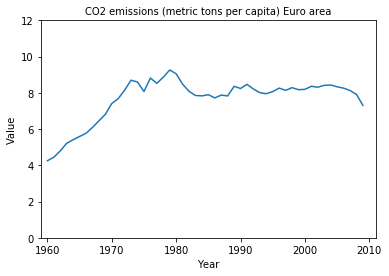

In [9]:
line_plot(df, 'Year', 'Value', axs=[1959, 2011, 0, 12])

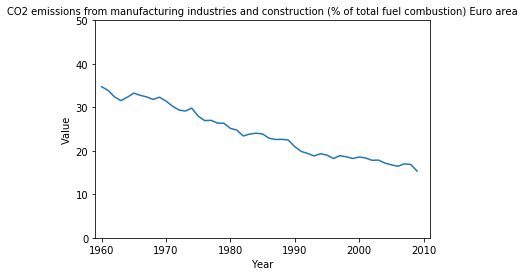

In [10]:
indicator_mask = indicators['IndicatorName'].str.contains(indicator2)
df = indicators[country_mask & indicator_mask]
line_plot(df, 'Year', 'Value')

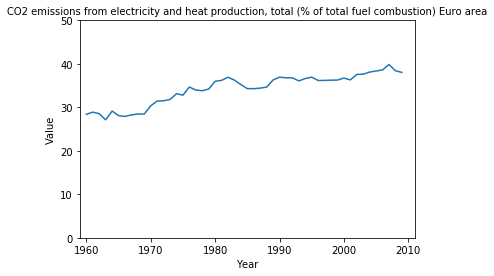

In [11]:
indicator_mask = indicators['IndicatorName'].str.contains(indicator3)
df = indicators[country_mask & indicator_mask]
line_plot(df, 'Year', 'Value')

### Perceiving

A look at the first plot shows a rise of CO2 emission per capita in the beginning and then it falls slightly back again in the rest of the plot. CO2 emission from manufracturing does not follow the same trend but CO2 emission from electricity does.

In [12]:
#np.corrcoef(indicators['IndicatorName'].str.contains(indicator2).tolist(), indicators['IndicatorName'].str.contains(indicator3).tolist())

### Sub-Saharan Africa

This is a different region from the Euro Area so it could be that this area shows different lines compared to the Euro Area

In [13]:
country = 'Sub-Saharan Africa \(all income levels\)'

country_mask = indicators['CountryName'].str.contains(country)
indicator_mask = indicators['IndicatorName'].str.contains(indicator1)
df = indicators[country_mask & indicator_mask]
africa_mean = df.Value.mean()
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3023,Sub-Saharan Africa (all income levels),SSF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.545417
26698,Sub-Saharan Africa (all income levels),SSF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.557071
53519,Sub-Saharan Africa (all income levels),SSF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.563015
81936,Sub-Saharan Africa (all income levels),SSF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.576257
110603,Sub-Saharan Africa (all income levels),SSF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.617429


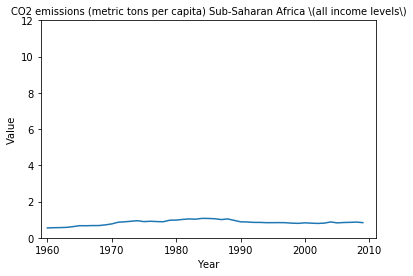

In [14]:
line_plot(df, 'Year', 'Value', axs=[1959, 2011, 0, 12])

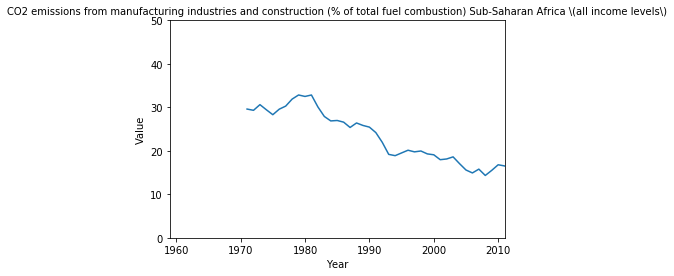

In [15]:
indicator_mask = indicators['IndicatorName'].str.contains(indicator2)
df = indicators[country_mask & indicator_mask]
line_plot(df, 'Year', 'Value')

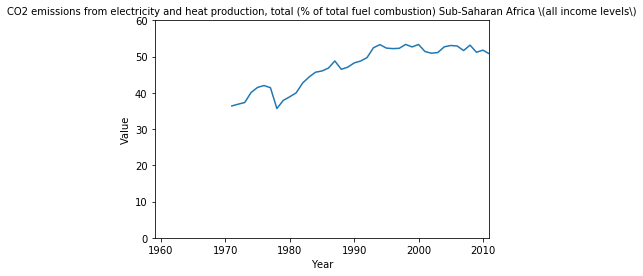

In [16]:
indicator_mask = indicators['IndicatorName'].str.contains(indicator3)
df = indicators[country_mask & indicator_mask]
line_plot(df, 'Year', 'Value', axs=[1959, 2011, 0, 60])

In [17]:
country = 'East Asia & Pacific \(all income levels\)'

country_mask = indicators['CountryName'].str.match(country)
indicator_mask = indicators['IndicatorName'].str.contains(indicator1)
df = indicators[country_mask & indicator_mask]
asia_mean = df.Value.mean()
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
239,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.162003
23472,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.996652
50099,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.895839
78540,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.914691
107167,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.942872


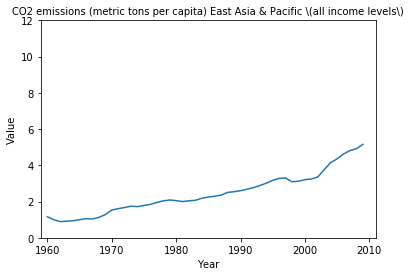

In [18]:
line_plot(df, 'Year', 'Value', axs=[1959, 2011, 0, 12])

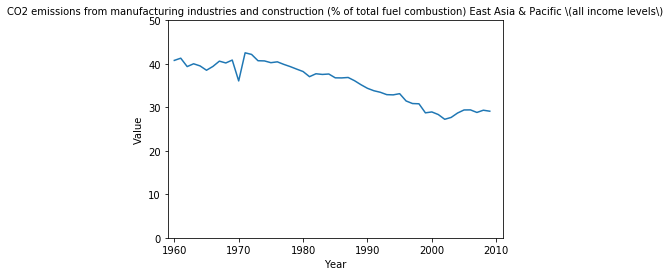

In [19]:
indicator_mask = indicators['IndicatorName'].str.contains(indicator2)
df = indicators[country_mask & indicator_mask]
line_plot(df, 'Year', 'Value')

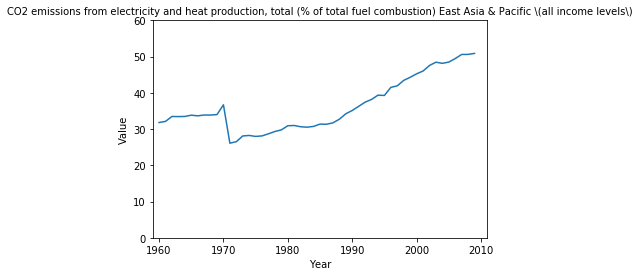

In [20]:
indicator_mask = indicators['IndicatorName'].str.contains(indicator3)
df = indicators[country_mask & indicator_mask]
line_plot(df, 'Year', 'Value', axs=[1959,2011,0,60])

In [21]:
print("Euro area has a mean of CO2 per capita in ton of: %s,\nAfrica has a mean of: %s,\nAsia has a mean of: %s"%(euro_mean, africa_mean, asia_mean))

Euro area has a mean of CO2 per capita in ton of: 7.652340071883767,
Africa has a mean of: 0.8428627973432039,
Asia has a mean of: 2.567753509219974


# First thoughts

These first visualisations of my investigation are not easy to compare. The countries in the Euro Area produce way more CO2 per capita. All the countries show an increase of electricity production related emission relative to their total CO2 emission. The opposite is true for emission of manufracturing. Let's explore the GDP related indicators now to see what we can see about that.

### GDP indicators

In [22]:
indicators['IndicatorName'][indicators['IndicatorName'].str.contains('GDP')].unique()

array(['Merchandise trade (% of GDP)',
       'GDP at market prices (current US$)',
       'GDP per capita (current US$)',
       'CO2 emissions (kg per 2005 US$ of GDP)',
       'Exports of goods and services (% of GDP)',
       'External balance on goods and services (% of GDP)',
       'GDP at market prices (constant 2005 US$)',
       'GDP per capita (constant 2005 US$)',
       'General government final consumption expenditure (% of GDP)',
       'Gross fixed capital formation (% of GDP)',
       'Imports of goods and services (% of GDP)', 'Trade (% of GDP)',
       'Agriculture, value added (% of GDP)',
       'Gross capital formation (% of GDP)',
       'Gross domestic savings (% of GDP)',
       'Household final consumption expenditure, etc. (% of GDP)',
       'Industry, value added (% of GDP)',
       'Manufacturing, value added (% of GDP)',
       'Services, etc., value added (% of GDP)',
       'Gross fixed capital formation, private sector (% of GDP)',
       'Final consum

Let's stick to GDP per capita for now...

In [23]:
indicator1 = 'GDP per capita \(current US'

In [24]:
country = 'Euro area'

country_mask = indicators['CountryName'].str.contains(country)
indicator_mask = indicators['IndicatorName'].str.contains(indicator1)
df = indicators[country_mask & indicator_mask]
euro_mean = df.Value.mean()
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
518,Euro area,EMU,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,924.571393
23793,Euro area,EMU,GDP per capita (current US$),NY.GDP.PCAP.CD,1961,1008.478502
50434,Euro area,EMU,GDP per capita (current US$),NY.GDP.PCAP.CD,1962,1108.797405
78869,Euro area,EMU,GDP per capita (current US$),NY.GDP.PCAP.CD,1963,1232.264642
107504,Euro area,EMU,GDP per capita (current US$),NY.GDP.PCAP.CD,1964,1358.085777


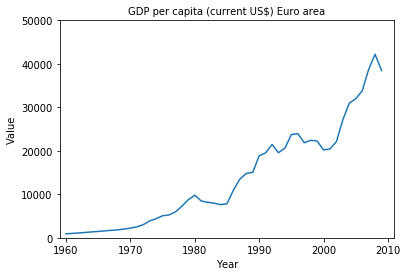

In [25]:
line_plot(df, 'Year', 'Value', axs=[1959, 2011, 0, 50000])

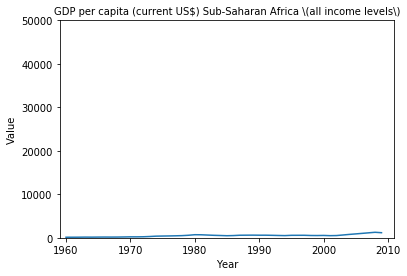

In [26]:
country = 'Sub-Saharan Africa \(all income levels\)'

country_mask = indicators['CountryName'].str.contains(country)
indicator_mask = indicators['IndicatorName'].str.contains(indicator1)
df = indicators[country_mask & indicator_mask]
africa_mean = df.Value.mean()
line_plot(df, 'Year', 'Value', axs=[1959, 2011, 0, 50000])

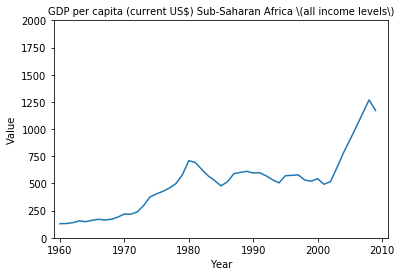

In [27]:
#adjust the y-axis in order to see what's happening...
line_plot(df, 'Year', 'Value', axs=[1959, 2011, 0, 2000])

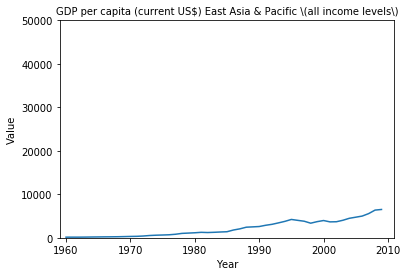

In [28]:
country = 'East Asia & Pacific \(all income levels\)'

country_mask = indicators['CountryName'].str.match(country)
indicator_mask = indicators['IndicatorName'].str.contains(indicator1)
df = indicators[country_mask & indicator_mask]
asia_mean = df.Value.mean()
line_plot(df, 'Year', 'Value', axs=[1959, 2011, 0, 50000])

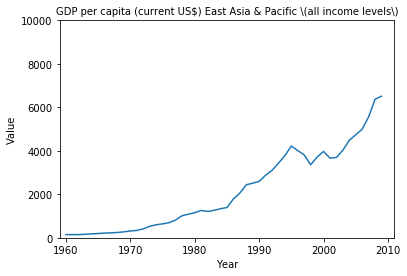

In [29]:
# again adjust y-axis.
line_plot(df, 'Year', 'Value', axs=[1959, 2011, 0, 10000])

### Shocking...
It is really shocking to see the way I have to adjust the range of the y-axis in order to have a proper look at the GDPs from African and Asian countries.

In [30]:
print("Euro area has a mean of GDP per capita of: %s,\nAfrica has a mean of: %s,\nAsia has a mean of: %s"%(euro_mean, africa_mean, asia_mean))

Euro area has a mean of GDP per capita of: 16023.546108698667,
Africa has a mean of: 613.3830296695488,
Asia has a mean of: 2762.437901369015


Also the mean over the full time range shows the differences.

# Timeline

I would like to use the library plotly to make a better visualisation of what is happening here. Before I can use plotly for what I want to show, I need to adjust the dataset a little.

I need the GDP and CO2 on a different column. For that I need to split the dataset in 2 temporary data frames, do whatever I have to do to gather my desired information and then combine those two temp dataframes again.

In [31]:
# Load the dataset again
indicators = pd.read_csv('world-development-indicators/Indicators.csv')
# Create a unique identifier to merge the datasets on later in this notebook
indicators['index1'] = indicators['Year'].astype(str) + indicators['CountryCode']
# Make a little selection already
df_plot = indicators[['CountryCode','index1', 'CountryName', 'IndicatorName', 'Year', 'Value']]

In [32]:
# Define the two maske for CO2 and GDP
mask1 = df_plot['IndicatorName'].str.contains('GDP per capita \(current US')
mask2 = df_plot['IndicatorName'].str.contains('CO2 emissions \(metric tons per capita')


df_plot1 = df_plot[mask1]
df_plot2 = df_plot[mask2]

In [33]:
# Rename columns for future identification
df_plot1 = df_plot1.rename(columns={'IndicatorName':'GDP', 'Value': 'Value_GDP'})
print(len(df_plot1))
df_plot1.head()

10343


,CountryCode,index1,CountryName,GDP,Year,Value_GDP
95,CSS,1960CSS,Caribbean small states,GDP per capita (current US$),1960,457.464712
264,EAS,1960EAS,East Asia & Pacific (all income levels),GDP per capita (current US$),1960,146.814138
377,EAP,1960EAP,East Asia & Pacific (developing only),GDP per capita (current US$),1960,89.319639
518,EMU,1960EMU,Euro area,GDP per capita (current US$),1960,924.571393
624,ECS,1960ECS,Europe & Central Asia (all income levels),GDP per capita (current US$),1960,648.223441


In [34]:
#df_plot1 = df_plot1.loc[(df_plot1['CountryName'].str.contains('East Asia & Pacific \(all income levels')) | (df_plot1['CountryName'].str.contains('Euro area'))|(df_plot1['CountryName'].str.contains('Sub-Saharan Africa \(all income levels'))]
#df_plot1[['Value_GDP', 'CountryName', 'index1', 'Year']][df_plot1['index1'].str.contains('East Asia & Pacific \(all income levels')].groupby('index1').mean()
df_plot1 = df_plot1[['Value_GDP', 'CountryName', 'index1', 'Year']].groupby('index1').mean()
df_plot1.head(10)

,Value_GDP,Year
index1,,
1960AFG,59.787681,1960
1960AUS,1806.804876,1960
1960AUT,935.460427,1960
1960BDI,70.333074,1960
1960BEL,1273.691659,1960
1960BEN,93.022585,1960
1960BFA,68.424706,1960
1960BGD,88.689453,1960
1960BHS,1550.337434,1960


In [35]:
# Rename and drop on second dataframe
df_plot2 = df_plot2.rename(columns={'IndicatorName':'CO2', 'Value':'Value_CO2'})

#df_plot2 = df_plot2.loc[(df_plot2['CountryName'].str.contains('East Asia & Pacific \(all income levels')) | (df_plot2['CountryName'].str.contains('Euro area'))|(df_plot2['CountryName'].str.contains('Sub-Saharan Africa \(all income levels'))]
#df_plot1[['Value_GDP', 'CountryName', 'index1', 'Year']][df_plot1['index1'].str.contains('East Asia & Pacific \(all income levels')].groupby('index1').mean()
df_plot2 = df_plot2[['Value_CO2', 'CountryName', 'index1', 'Year']].groupby('index1').mean()
df_plot2.head(10)

,Value_CO2,Year
index1,,
1960AFG,0.046068,1960
1960AGO,0.104357,1960
1960ALB,1.258195,1960
1960ARB,0.643964,1960
1960ARE,0.118786,1960
1960ARG,2.367473,1960
1960ATG,0.670617,1960
1960AUS,8.582937,1960
1960AUT,4.373319,1960


In [36]:
# Merge the two dataframes again
df = df_plot1.merge(df_plot2, on='index1').reset_index()
df.drop('Year_x', axis=1, inplace=True)
df.head()

,index1,Value_GDP,Value_CO2,Year_y
0,1960AFG,59.787681,0.046068,1960
1,1960AUS,1806.804876,8.582937,1960
2,1960AUT,935.460427,4.373319,1960
3,1960BEL,1273.691659,9.941594,1960
4,1960BEN,93.022585,0.066354,1960


In [37]:
# Print length of what's left.
len(df)

9135

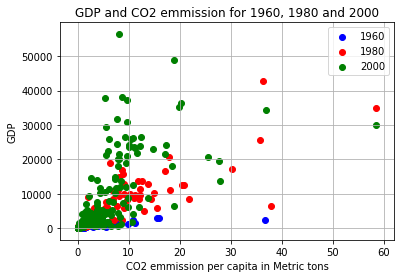

In [38]:
fig, axis = plt.subplots()
axis.scatter(df[df['Year_y'].isin([1960])]['Value_CO2'].values, df[df['Year_y'].isin([1960])]['Value_GDP'].values, c='blue', label='1960')
axis.scatter(df[df['Year_y'].isin([1980])]['Value_CO2'].values, df[df['Year_y'].isin([1980])]['Value_GDP'].values, c='red', label='1980')
axis.scatter(df[df['Year_y'].isin([2000])]['Value_CO2'].values, df[df['Year_y'].isin([2000])]['Value_GDP'].values, c='green', label='2000')
axis.set_title('GDP and CO2 emmission for 1960, 1980 and 2000')
axis.set_xlabel('CO2 emmission per capita in Metric tons')
axis.set_ylabel('GDP')
axis.legend()
axis.grid(True)
plt.show()

### Scatterplot

The scatterplot above shows that GDP and CO2 have some relation between each other. This gives me some confidence that the plotly plot will provide some interesting insights.

I want to add an extra dimension to the plotly plot, I would like to see the population growth so, let's try to add that to the dataset.

In [39]:
indicators['IndicatorName'][indicators['IndicatorName'].str.contains('population')].unique().tolist()

['Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'International migrant stock (% of population)',
 'Population in the largest city (% of urban population)',
 'Population in urban agglomerations of more than 1 million (% of total population)',
 'Rural population',
 'Rural population (% of total population)',
 'Urban population',
 'Urban population (% of total)',
 'Rural population growth (annual %)',
 'Urban population growth (annual %)',
 'Adult literacy rate, population 15+ years, both sexes (%)',
 'Adult literacy rate, population 15+ years, female (%)',
 'Adult literacy rate, population 15+ years, male (%)',
 'Youth literacy rate, population 15-24 years, both sexes (%)',
 'Youth literacy rate, population 15-24 years, female (%)',
 'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
 'Youth literacy rate, population 15-24 years, male (%

Seem like there is no total population. Let's see if we can create a new feature

In [40]:
#indicators['Total Population'] = indicators['Rural population'] + indicators['Urban population']
population = indicators.loc[(indicators['IndicatorName'].str.match('Rural population')) | (indicators['IndicatorName'].str.match('Urban population'))]

population.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,index1
74,Arab World,ARB,Rural population,SP.RUR.TOTL,1960,6.355820e+07,1960ARB
75,Arab World,ARB,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,6.871462e+01,1960ARB
78,Arab World,ARB,Urban population,SP.URB.TOTL,1960,2.893770e+07,1960ARB
79,Arab World,ARB,Urban population (% of total),SP.URB.TOTL.IN.ZS,1960,3.128538e+01,1960ARB
151,Caribbean small states,CSS,Rural population,SP.RUR.TOTL,1960,2.866619e+06,1960CSS


In [41]:
rural = population.loc[population['IndicatorName']=='Rural population']
urban = population.loc[population['IndicatorName']=='Urban population']

In [42]:
rural.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,index1
74,Arab World,ARB,Rural population,SP.RUR.TOTL,1960,63558203.0,1960ARB
151,Caribbean small states,CSS,Rural population,SP.RUR.TOTL,1960,2866619.0,1960CSS
222,Central Europe and the Baltics,CEB,Rural population,SP.RUR.TOTL,1960,50720637.0,1960CEB
343,East Asia & Pacific (all income levels),EAS,Rural population,SP.RUR.TOTL,1960,799992005.0,1960EAS
463,East Asia & Pacific (developing only),EAP,Rural population,SP.RUR.TOTL,1960,744827185.0,1960EAP


In [43]:
rural = rural[['index1', 'Value']].groupby('index1').mean()
urban = urban[['index1', 'Value']].groupby('index1').mean()

In [44]:
total_pop = rural.merge(urban, on='index1')
total_pop['tot_pop'] = total_pop['Value_x'] + total_pop['Value_y']
total_pop = total_pop.drop(['Value_x', 'Value_y'], axis=1).reset_index()
total_pop.head()

,index1,tot_pop
0,1960ABW,54208.0
1,1960ADO,13414.0
2,1960AFG,8994793.0
3,1960AGO,5270844.0
4,1960ALB,1608800.0


In [45]:
df = df.merge(total_pop, on='index1')
df.head()

,index1,Value_GDP,Value_CO2,Year_y,tot_pop
0,1960AFG,59.787681,0.046068,1960,8994793.0
1,1960AUS,1806.804876,8.582937,1960,10276477.0
2,1960AUT,935.460427,4.373319,1960,7047539.0
3,1960BEL,1273.691659,9.941594,1960,9153489.0
4,1960BEN,93.022585,0.066354,1960,2431620.0


In [46]:
from string import digits
df['CountryCode'] = df['index1'].str[4:]
df.head()

,index1,Value_GDP,Value_CO2,Year_y,tot_pop,CountryCode
0,1960AFG,59.787681,0.046068,1960,8994793.0,AFG
1,1960AUS,1806.804876,8.582937,1960,10276477.0,AUS
2,1960AUT,935.460427,4.373319,1960,7047539.0,AUT
3,1960BEL,1273.691659,9.941594,1960,9153489.0,BEL
4,1960BEN,93.022585,0.066354,1960,2431620.0,BEN


### Also add the regions

This makes the plotly plot even more easy to read, I will use it to colourise the countries per region.

In [47]:
countries = pd.read_csv('world-development-indicators/Country.csv')
countries = countries[['CountryCode', 'Region', 'ShortName']]
df = df.merge(countries, on='CountryCode')
df.head()

,index1,Value_GDP,Value_CO2,Year_y,tot_pop,CountryCode,Region,ShortName
0,1960AFG,59.787681,0.046068,1960,8994793.0,AFG,South Asia,Afghanistan
1,1961AFG,59.890037,0.053615,1961,9164945.0,AFG,South Asia,Afghanistan
2,1962AFG,58.505995,0.073781,1962,9343772.0,AFG,South Asia,Afghanistan
3,1963AFG,78.802587,0.074251,1963,9531555.0,AFG,South Asia,Afghanistan
4,1964AFG,82.231395,0.086317,1964,9728645.0,AFG,South Asia,Afghanistan


# Plotly time

Finally, we have arrived at the plotly part. Plotly is an amazing library that allows for presentations similar to Hans Rosling. I use this plot to demonstrate the relation between getting rich and the emmision of CO2.

In [48]:
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML

import pandas as pd

init_notebook_mode(connected=True)

dataset = df
years = sorted(df.Year_y.unique().tolist()) 
# make list of continents
continents = []
for continent in df['Region']:
    if continent not in continents:
        continents.append(continent)
# make figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

# fill in most of layout
figure['layout']['xaxis'] = {'title': 'CO2 emission (in metric tons) per capita (log scale)', 'type': 'log', 'range': [-2, 2], 'autorange': False}
figure['layout']['yaxis'] = {'title': 'GDP per Capita (log scale)', 'type': 'log', 'range':[-2,6],'autorange': False}
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 400,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': '1959',
    'plotlycommand': 'animate',
    'values': years,
    'visible': True
}
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

# make data
year = 1959
for continent in continents:
    dataset_by_year = df[df['Year_y'] == year]
    dataset_by_year_and_cont = dataset_by_year[dataset_by_year['Region'] == continent]
    data_dict = {
        'x': list(dataset_by_year_and_cont['Value_CO2']),
        'y': list(dataset_by_year_and_cont['Value_GDP']),
        'mode': 'markers',
        'text': list(dataset_by_year_and_cont['ShortName']),
        'marker': {
            'sizemode': 'area',
            'sizeref': 100000,
            'size': list(dataset_by_year_and_cont['tot_pop'])
        },
        'name': continent
    }
    figure['data'].append(data_dict)
    
# make frames
for year in years:
    frame = {'data': [], 'name': str(year)}
    for continent in continents:
        dataset_by_year = dataset[dataset['Year_y'] == int(year)]
        dataset_by_year_and_cont = dataset_by_year[dataset_by_year['Region'] == continent]

        data_dict = {
            'x': list(dataset_by_year_and_cont['Value_CO2']),
            'y': list(dataset_by_year_and_cont['Value_GDP']),
            'mode': 'markers',
            'text': list(dataset_by_year_and_cont['ShortName']),
            'marker': {
                'sizemode': 'area',
                'sizeref': 100000,
                'size': list(dataset_by_year_and_cont['tot_pop'])
            },
            'name': continent
        }
        frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': year,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

    
figure['layout']['sliders'] = [sliders_dict]

iplot(figure)

# The top ten percent richest countries..

I am going to make an assumption here. I think a good approximation of telling how rich a country is, is by multiplying the GDP per captita with the total population. I'm going to call that feature 'Wealth' and I will use that to select the top 10 richest countries.

In [49]:
# Quick reminder
df.head()

,index1,Value_GDP,Value_CO2,Year_y,tot_pop,CountryCode,Region,ShortName
0,1960AFG,59.787681,0.046068,1960,8994793.0,AFG,South Asia,Afghanistan
1,1961AFG,59.890037,0.053615,1961,9164945.0,AFG,South Asia,Afghanistan
2,1962AFG,58.505995,0.073781,1962,9343772.0,AFG,South Asia,Afghanistan
3,1963AFG,78.802587,0.074251,1963,9531555.0,AFG,South Asia,Afghanistan
4,1964AFG,82.231395,0.086317,1964,9728645.0,AFG,South Asia,Afghanistan


In [50]:
# Create the wealth variable and total CO2 variable
df['Wealth'] = df['Value_GDP'] * df['tot_pop']
df['TotalCO2'] = df['Value_CO2'] * df['tot_pop']

In [51]:
#Find the number that make up the top 10% richest countries

print(len(df[df['Year_y'].isin([2011])].sort_values(by='Wealth', ascending=False).dropna()))

190


In [52]:
df[df['Year_y'].isin([2011])].sort_values(by='Wealth', ascending=False).dropna()[:19]

,index1,Value_GDP,Value_CO2,Year_y,tot_pop,CountryCode,Region,ShortName,Wealth,TotalCO2
5438,2011USA,49781.357490,17.020216,2011,3.117216e+08,USA,North America,United States,1.551793e+13,5.305570e+09
802,2011CHN,5574.187093,6.710302,2011,1.344130e+09,CHN,East Asia & Pacific,China,7.492432e+12,9.019518e+09
2708,2011JPN,46203.709519,9.291834,2011,1.278173e+08,JPN,East Asia & Pacific,Japan,5.905632e+12,1.187657e+09
8451,2011DEU,45936.081260,8.917833,2011,8.179767e+07,DEU,Europe & Central Asia,Germany,3.757465e+12,7.294580e+08
1738,2011FRA,43807.475903,5.185043,2011,6.534278e+07,FRA,Europe & Central Asia,France,2.862502e+12,3.388051e+08
552,2011BRA,13042.421933,2.191394,2011,2.005176e+08,BRA,Latin America & Caribbean,Brazil,2.615235e+12,4.394129e+08
1842,2011GBR,41020.376964,7.085732,2011,6.325892e+07,GBR,Europe & Central Asia,United Kingdom,2.594905e+12,4.482357e+08
2604,2011ITA,38364.942670,6.702558,2011,5.937945e+07,ITA,Europe & Central Asia,Italy,2.278089e+12,3.979942e+08
8753,2011RUS,13323.883375,12.647328,2011,1.429609e+08,RUS,Europe & Central Asia,Russia,1.904794e+12,1.808073e+09
2310,2011IND,1471.658439,1.662873,2011,1.247446e+09,IND,South Asia,India,1.835814e+12,2.074345e+09


### Top 10

So, above we see my created top 10. Im going to use that to sum up their emission for the 2008 and compare that with the total emission of the World

In [53]:
top10 = df[df['Year_y'].isin([2011])].sort_values(by='Wealth', ascending=False).dropna()[:19]['TotalCO2'].sum()
print(top10)

25019651307.000027


In [54]:
world = df[df['Year_y'].isin([2011])].sort_values(by='Wealth', ascending=False).dropna()['TotalCO2'].sum()
print(world)

32255757609.263565


In [55]:
top10/world*100

77.56646614871202

In [56]:
world/2

16127878804.631783

In [57]:
top10 = df[df['Year_y'].isin([2011])].sort_values(by='Wealth', ascending=False).dropna()[:57]['Value_CO2'].sum()
print(top10)

467.4073989600141


# Conclusion

Based on this dataset, looking at the last available year and given that I had to make some assumptions, I cannot come to the same conclusion as the Groene Amsterdammer. According to the the used methododoly in this notebook the top10percent richest countrries emit 77% percent off all CO2 in the world in 2011. 